# Pima Indians Dibetes Prediction

##### Import Statements

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

##### Data Analysis

In [3]:
# Reading the csv file.
diabetes_db = pd.read_csv(r"Z:\Projects\Pima Indians Diabetes ML Model\data\diabetes.csv")

In [4]:
# Display the first five records of the csv file
diabetes_db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Check the shape to display the number of records and features
diabetes_db.shape

(768, 9)

In [6]:
# Generating a Statistical Analysis of the database
diabetes_db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# import visulization libraries
import matplotlib.pyplot as plt

In [8]:
label_counts = diabetes_db['Outcome'].value_counts()

In [11]:
plt.Figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Count of Outcome Labels')

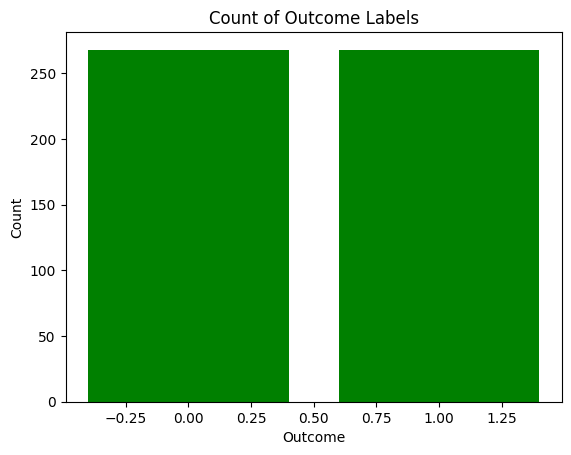

In [26]:
plt.bar(label_counts.index, label_counts.values, color='green')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count of Outcome Labels')

In [14]:
label_counts

Outcome
0    500
1    268
Name: count, dtype: int64

###### What's happening here is that number of zeros is way more than the number of ones. This is a flaw in the dataset which needs to be taken care of else our model will become biased to choose zeros in outcome. This is known as Under Sample

In [16]:
df_class_0 = diabetes_db[diabetes_db['Outcome'] == 0]
df_class_1 = diabetes_db[diabetes_db['Outcome'] == 1]

In [18]:
# This basically extracts the length of the df_class_1 & makes df_class_0 of length same as df_class_1
df_class_0 = df_class_0.sample(len(df_class_1))

In [19]:
# Now we can go ahead merging the two datasets using pd.concat()
diabetes_db = pd.concat([df_class_0, df_class_1]) 

In [20]:
label_counts = diabetes_db['Outcome'].value_counts()

In [ ]:
# We can now clearly see that their are equal number of zeros & ones through DA.
label_counts

Outcome
0    268
1    268
Name: count, dtype: int64

In [28]:
X = diabetes_db.drop(columns='Outcome', axis=1)

In [29]:
y = diabetes_db['Outcome']

In [32]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
203,2,99,70,16,44,20.4,0.235,27
521,3,124,80,33,130,33.2,0.305,26
62,5,44,62,0,0,25.0,0.587,36
71,5,139,64,35,140,28.6,0.411,26
...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37
757,0,123,72,0,0,36.3,0.258,52
759,6,190,92,0,0,35.5,0.278,66
761,9,170,74,31,0,44.0,0.403,43


In [33]:
y

668    0
203    0
521    0
62     0
71     0
      ..
755    1
757    1
759    1
761    1
766    1
Name: Outcome, Length: 536, dtype: int64